# Exploratory Data Analysis

In [29]:
import sys
import re
sys.path.append('../')

import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters

from src.data.make_dataset import make_dataset

register_matplotlib_converters()

## Load data

In [2]:
messages, participants, reactions = make_dataset('../data/raw/retardgang/message_1.json')

In [3]:
participants.head(6)

,name
0,Maude Mb
1,Jean-FranÃ§ois Boucher
2,Kareem Green
3,Alex Ratchev
4,Martin Gaudreault R
5,Charles Demontigny


In [4]:
messages.head()

,content,id,content_type,sender_name,time
0,{'uri': 'messages/stickers_used/39178562_15051...,0,sticker,Maude Mb,2019-03-29 22:14:36.487
1,Faut jsois pres de che vs a 19h. Jvs rejoins a...,1,messages,Kareem Green,2019-03-29 22:13:28.024
2,Ye 18h,2,messages,Kareem Green,2019-03-29 22:13:01.251
3,Relax,3,messages,Kareem Green,2019-03-29 22:12:57.743
4,Fuck that,4,messages,Maude Mb,2019-03-29 22:12:49.591


In [5]:
reactions.head()

,actor,reaction,id
0,Maude Mb,ð,31
0,Maude Mb,ð,85
0,Charles Demontigny,ð,92
0,Maude Mb,ð,103
0,Kareem Green,ð,156


## Counts

In [6]:
print(messages.sender_name.value_counts())
print(messages.content_type.value_counts())

Maude Mb                  15060
Kareem Green               9504
Alex Ratchev               5860
Charles Demontigny         5707
Jean-FranÃ§ois Boucher     3467
Martin Gaudreault R        2359
Name: sender_name, dtype: int64
messages       40225
sticker          781
photos           650
gifs             241
videos            57
audio_files        2
files              1
Name: content_type, dtype: int64


In [7]:
15060/messages.shape[0]

0.35893891364968894

In [8]:
(1/6) * 2

0.3333333333333333

In [9]:
sticker = messages.query("content_type == 'sticker'")
sticker.sender_name.value_counts()

Maude Mb                  357
Kareem Green              188
Jean-FranÃ§ois Boucher     95
Charles Demontigny         75
Martin Gaudreault R        44
Alex Ratchev               22
Name: sender_name, dtype: int64

In [10]:
gifs = messages.query("content_type == 'gifs'")
gifs.sender_name.value_counts()

Kareem Green              139
Alex Ratchev               73
Maude Mb                   21
Jean-FranÃ§ois Boucher      4
Martin Gaudreault R         4
Name: sender_name, dtype: int64

In [11]:
photos = messages.query("content_type == 'photos'")
photos.sender_name.value_counts().head()

Maude Mb                  258
Alex Ratchev              167
Kareem Green              103
Charles Demontigny         77
Jean-FranÃ§ois Boucher     31
Name: sender_name, dtype: int64

## Time Series

In [12]:
messages['date'] = messages['time'].dt.strftime('%Y-%m-%d')
count_by_day = messages.groupby('date').count()
count_by_day.reset_index(inplace = True)
count_by_day = count_by_day[['date', 'content']].copy()
count_by_day['date'] = pd.to_datetime(count_by_day['date'])
count_by_day.set_index('date', inplace = True)

In [13]:
count_by_day.index

DatetimeIndex(['2017-01-27', '2017-01-28', '2017-01-31', '2017-02-01',
               '2017-02-02', '2017-02-03', '2017-02-04', '2017-02-05',
               '2017-02-07', '2017-02-08',
               ...
               '2019-03-18', '2019-03-19', '2019-03-20', '2019-03-21',
               '2019-03-22', '2019-03-25', '2019-03-26', '2019-03-27',
               '2019-03-28', '2019-03-29'],
              dtype='datetime64[ns]', name='date', length=522, freq=None)

(array([736330., 736420., 736511., 736603., 736695., 736785., 736876.,
        736968., 737060., 737150.]), <a list of 10 Text xticklabel objects>)

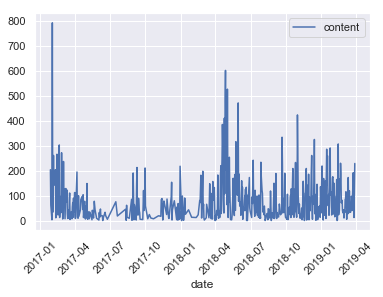

In [14]:
sns.set(style="darkgrid")
sns.lineplot(data = count_by_day)
plt.xticks(rotation=45)

In [15]:
messages['month'] = messages['time'].dt.strftime('%Y-%m')
count_by_month = messages.groupby('month').count()
count_by_month.reset_index(inplace = True)
count_by_month = count_by_month[['month', 'content']].copy()
count_by_month['month'] = pd.to_datetime(count_by_month['month'])
count_by_month.set_index('month', inplace = True)

(array([736330., 736420., 736511., 736603., 736695., 736785., 736876.,
        736968., 737060., 737150.]), <a list of 10 Text xticklabel objects>)

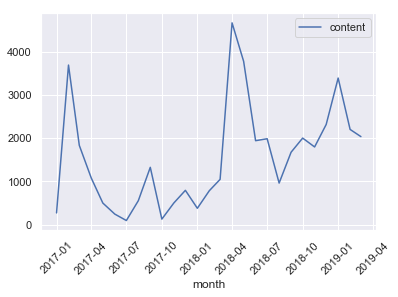

In [16]:
sns.set(style="darkgrid")
sns.lineplot(data = count_by_month)
plt.xticks(rotation=45)

## Reactions par message 

In [17]:
reactions.head()

,actor,reaction,id
0,Maude Mb,ð,31
0,Maude Mb,ð,85
0,Charles Demontigny,ð,92
0,Maude Mb,ð,103
0,Kareem Green,ð,156


In [18]:
reactions.shape

(872, 3)

In [19]:
len(set(reactions.id.values))/len(messages)

0.019090974092523298

In [20]:
reactions.actor.value_counts()

Maude Mb                  470
Charles Demontigny        151
Jean-FranÃ§ois Boucher     87
Alex Ratchev               77
Kareem Green               66
Martin Gaudreault R        21
Name: actor, dtype: int64

## Text

In [30]:
text_df = messages.query('content_type == "messages"')
text = " ".join(list(text_df.content.values))

In [33]:
text

'Faut jsois pres de che vs a 19h. Jvs rejoins apres Ye 18h Relax Fuck that Jpasse laspirateur la Val sen vient Jfa lmenage un peu Jtak jjess et cecile Viens Pis charles Tu fais quoi @Daniel On est au patick pub Yo To Je serais down de chiller je vais rejoindre Louison sur le plateau. Vous faites quoi non jai du cosom Tu chill tu martin Aiiights Chilling avec les freros Souper avec ma mÃ¨re Moi je reste south pour live Allez chop chop les garÃ§ons Jfini live moi lala Ya meme pas de traffic yÃ© encore tot Apres sa vaiselle Vnez donc Ye busy Viens donc Jvais rester Ã\xa0 mtl @Kareem Green Oui DerniÃ¨rement Tas recoucher ak Phil derniÃ¨re t ? What Avec phil+? Je comprends Mais jai pas envie den parler dans les dÃ©tails devant lui Non mais il le sait que je vois dautres monde Il va se protÃ©ger Quâ\x80\x99il le sache que tu vois dâ\x80\x99autres mondes Bin justement Fak entÃ©ka Jai couchÃ© avec rÃ©cemment...... Pis comme Mais jme sens mÃ©ga awkward par rapport Ã\xa0 cw Lol Je sais bin Tâ\x8

In [40]:
def getWords(s, letter):
    words = s.split()
    return [a for a,b in ((word, set(word.lower()[::len(word)-1])) for word in words) if letter in b and len(b)==2]

In [54]:
split = text.split(' ')
subset = split[0:40]

In [64]:
[word[0] is '@' for word in subset]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False]